#A data science project based on R and Exploratory Data Analysis in which it is predicted
#to give loan or not based on the given data

In [0]:
#Work done in RStudio
library(caret)
library(tidyverse)
data_set<-read.csv("D:/Ivy/DS_Training/LoanPred.csv")
test_original<-read.csv("D:/Ivy/Files/projects/LoanPred/test.csv")
submission=read_csv("D:/Ivy/Files/projects/LoanPred/sample_submission_49d68Cx.csv")
glimpse(data_set)
sapply(data_set, function(x)sum(is.na(x)))
library(DataExplorer)
plot_missing(data_set)
data_set['Credit_History']<-as.factor(data_set['Credit_History'])
create_report(data_set)
data_set["Total_Income"]<-data_set["ApplicantIncome"]+data_set['CoapplicantIncome']
#normality check: ApplicantIncome/CoapplicantIncome<outlier>
data_set['Log_ApplicantIncome']<-log(data_set['ApplicantIncome'])
hist(log(data_set$ApplicantIncome))
qqnorm(log(data_set$ApplicantIncome))
qqline(log(data_set$ApplicantIncome))

hist(data_set$CoapplicantIncome)
hist(log(data_set$CoapplicantIncome))
data_set['Log_CoapplicantIncome']<-log(data_set$CoapplicantIncome)
qqnorm(data_set$Log_CoapplicantIncome)
qqline(data_set$Log_CoapplicantIncome)
data_set<-data_set[,-c(1,7,8)]

write.table(data_set,"D:/Ivy/Files/projects/LoanPred/loan_train.csv",sep=",")

In [0]:
import pandas as pd
import matplotlib.pyplot as plt
!pip install pycaret

     |████████████████████████████████| 194kB 2.7MB/s 
     |████████████████████████████████| 102kB 6.5MB/s 
     |████████████████████████████████| 389kB 7.6MB/s 
     |████████████████████████████████| 133kB 12.6MB/s 
     |████████████████████████████████| 1.6MB 12.0MB/s 
     |████████████████████████████████| 63.9MB 58kB/s 
     |████████████████████████████████| 61kB 7.1MB/s 
     |████████████████████████████████| 3.0MB 42.9MB/s 
     |████████████████████████████████| 7.0MB 12.7MB/s 
     |████████████████████████████████| 81kB 10.0MB/s 
     |████████████████████████████████| 1.2MB 42.9MB/s 
     |████████████████████████████████| 266kB 49.1MB/s 
     |████████████████████████████████| 2.1MB 33.3MB/s 
     |████████████████████████████████| 614kB 42.8MB/s 
     |████████████████████████████████| 552kB 40.5MB/s 
     |████████████████████████████████| 235kB 48.4MB/s 
     |████████████████████████████████| 6.2MB 42.8MB/s 
     |████████████████████████████████| 51kB 6.6MB/s 
 

In [11]:
data = pd.read_csv("/content/loan_train.csv")
data.head()

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Total_Income,Log_ApplicantIncome,Log_CoapplicantIncome
1,Male,No,0,Graduate,No,NaN,360.0,1.0,Urban,Y,5849.0,8.674026,-inf
2,Male,Yes,1,Graduate,No,128.0,360.0,1.0,Rural,N,6091.0,8.430109,7.318540
3,Male,Yes,0,Graduate,Yes,66.0,360.0,1.0,Urban,Y,3000.0,8.006368,-inf
4,Male,Yes,0,Not Graduate,No,120.0,360.0,1.0,Urban,Y,4941.0,7.856707,7.765569
5,Male,No,0,Graduate,No,141.0,360.0,1.0,Urban,Y,6000.0,8.699515,-inf


In [0]:
data['Dependents'].replace('3+', 3,inplace=True)
#data['Dependents'].replace('3+', 3,inplace=True)
data['Loan_Status'].replace('N', 0,inplace=True) 
data['Loan_Status'].replace('Y', 1,inplace=True)

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


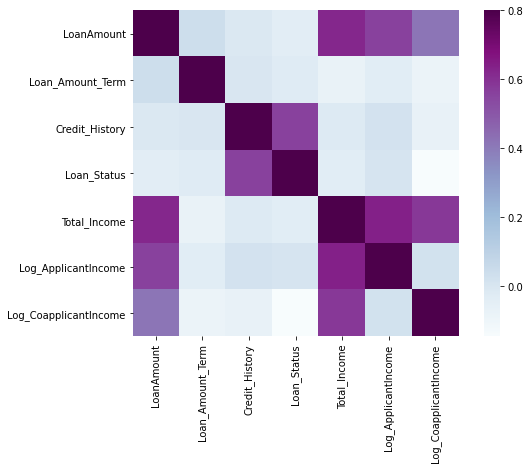

In [13]:
import seaborn as sns
matrix = data.corr()
f, ax = plt.subplots(figsize=(9, 6))
sns.heatmap(matrix, vmax=.8, square=True, cmap="BuPu")

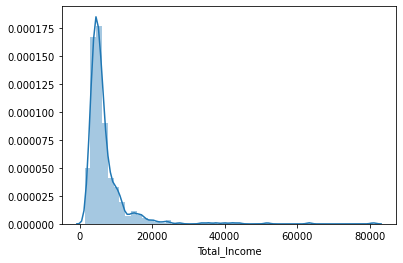

In [14]:
sns.distplot(data['Total_Income'])

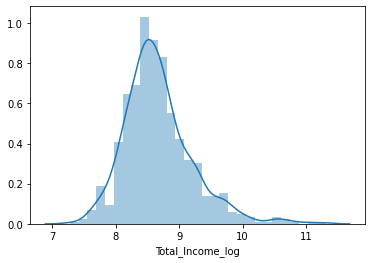

In [15]:
import numpy as np
data['Total_Income_log'] = np.log(data['Total_Income'])
sns.distplot(data['Total_Income_log'])

In [0]:
data['EMI']=data['LoanAmount']/data['Loan_Amount_Term'] 
data['Balance Income']=data['Total_Income']-(data['EMI']*1000)

In [0]:
data = data.drop(['Loan_Amount_Term','Total_Income'], axis=1)

In [18]:
from pycaret.classification import *
clf = setup(data = data, target = 'Loan_Status', train_size = 0.8, numeric_imputation="median", feature_selection = True, categorical_imputation='mode', normalize=True) #feature_selection = True, remove_outliers=True,numeric_imputation="median"

 
Setup Succesfully Completed!


,Description,Value
0,session_id,5154
1,Target Type,Binary
2,Label Encoded,None
3,Original Data,"(614, 14)"
4,Missing Values,True
5,Numeric Features,6
6,Categorical Features,7
7,Ordinal Features,False
8,High Cardinality Features,False
9,High Cardinality Method,None


In [19]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Logistic Regression,0.808600,0.756900,0.979300,0.794200,0.876200,0.474100
1,Ridge Classifier,0.808600,0.000000,0.979300,0.794200,0.876200,0.474100
2,Linear Discriminant Analysis,0.808600,0.751600,0.979300,0.794200,0.876200,0.474100
3,Extreme Gradient Boosting,0.796300,0.762900,0.937500,0.801700,0.863500,0.469800
4,Naive Bayes,0.794300,0.749700,0.943800,0.797500,0.863400,0.456800
5,CatBoost Classifier,0.790200,0.790500,0.931700,0.798000,0.858800,0.456900
6,Gradient Boosting Classifier,0.788100,0.767800,0.925800,0.799500,0.856700,0.454300
7,Ada Boost Classifier,0.780100,0.705200,0.929100,0.790500,0.852800,0.425000
8,Extra Trees Classifier,0.780000,0.751000,0.899000,0.805700,0.849000,0.447000
9,Light Gradient Boosting Machine,0.771800,0.786700,0.898800,0.797500,0.844000,0.421700


In [20]:
#Create an Extreme Gradient Boosting model
xgboost = create_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8200,0.7969,0.9706,0.8049,0.8800,0.5322
1,0.7755,0.6761,0.9091,0.7895,0.8451,0.4449
2,0.7143,0.7992,0.8788,0.7436,0.8056,0.2809
3,0.8163,0.8314,0.9697,0.8000,0.8767,0.5293
4,0.7755,0.7588,0.8824,0.8108,0.8451,0.4403
5,0.7551,0.6118,0.9412,0.7619,0.8421,0.3226
6,0.8163,0.6765,0.9412,0.8205,0.8767,0.5232
7,0.8571,0.9020,0.9118,0.8857,0.8986,0.6573
8,0.8776,0.8725,1.0000,0.8500,0.9189,0.6755
9,0.7551,0.7039,0.9706,0.7500,0.8462,0.2916


In [21]:
lda = create_model('lda')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8000,0.7518,0.9706,0.7857,0.8684,0.4703
1,0.7959,0.6439,0.9697,0.7805,0.8649,0.4674
2,0.7959,0.7803,1.0000,0.7674,0.8684,0.4470
3,0.8367,0.7992,1.0000,0.8049,0.8919,0.5739
4,0.7959,0.7843,0.9706,0.7857,0.8684,0.4355
5,0.7143,0.6529,0.9412,0.7273,0.8205,0.1735
6,0.8367,0.7333,0.9706,0.8250,0.8919,0.5673
7,0.9184,0.8922,0.9706,0.9167,0.9429,0.8004
8,0.8367,0.7451,1.0000,0.8095,0.8947,0.5484
9,0.7551,0.7333,1.0000,0.7391,0.8500,0.2576


In [22]:
ridge = create_model("ridge")

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8000,0.0,0.9706,0.7857,0.8684,0.4703
1,0.7959,0.0,0.9697,0.7805,0.8649,0.4674
2,0.7959,0.0,1.0000,0.7674,0.8684,0.4470
3,0.8367,0.0,1.0000,0.8049,0.8919,0.5739
4,0.7959,0.0,0.9706,0.7857,0.8684,0.4355
5,0.7143,0.0,0.9412,0.7273,0.8205,0.1735
6,0.8367,0.0,0.9706,0.8250,0.8919,0.5673
7,0.9184,0.0,0.9706,0.9167,0.9429,0.8004
8,0.8367,0.0,1.0000,0.8095,0.8947,0.5484
9,0.7551,0.0,1.0000,0.7391,0.8500,0.2576


In [23]:
lr = create_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8000,0.7665,0.9706,0.7857,0.8684,0.4703
1,0.7959,0.6534,0.9697,0.7805,0.8649,0.4674
2,0.7959,0.7936,1.0000,0.7674,0.8684,0.4470
3,0.8367,0.8030,1.0000,0.8049,0.8919,0.5739
4,0.7959,0.7961,0.9706,0.7857,0.8684,0.4355
5,0.7143,0.6549,0.9412,0.7273,0.8205,0.1735
6,0.8367,0.7353,0.9706,0.8250,0.8919,0.5673
7,0.9184,0.8941,0.9706,0.9167,0.9429,0.8004
8,0.8367,0.7333,1.0000,0.8095,0.8947,0.5484
9,0.7551,0.7392,1.0000,0.7391,0.8500,0.2576


In [24]:
#Tuned xgboost model
tuned_xgboost = tune_model('xgboost')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8400,0.7812,0.9412,0.8421,0.8889,0.6063
1,0.7551,0.7083,0.8788,0.7838,0.8286,0.4049
2,0.7143,0.7898,0.8485,0.7568,0.8000,0.3057
3,0.7755,0.8239,0.9091,0.7895,0.8451,0.4449
4,0.7551,0.8000,0.8235,0.8235,0.8235,0.4235
5,0.7551,0.6275,0.9118,0.7750,0.8378,0.3510
6,0.7551,0.7333,0.8529,0.8056,0.8286,0.4012
7,0.8367,0.8627,0.8824,0.8824,0.8824,0.6157
8,0.8367,0.8412,0.9118,0.8611,0.8857,0.6008
9,0.7755,0.7078,0.9118,0.7949,0.8493,0.4173


In [25]:
tuned_ridge = tune_model('ridge')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8000,0.0,0.9706,0.7857,0.8684,0.4703
1,0.7959,0.0,0.9697,0.7805,0.8649,0.4674
2,0.7959,0.0,1.0000,0.7674,0.8684,0.4470
3,0.8367,0.0,1.0000,0.8049,0.8919,0.5739
4,0.7959,0.0,0.9706,0.7857,0.8684,0.4355
5,0.7143,0.0,0.9412,0.7273,0.8205,0.1735
6,0.8367,0.0,0.9706,0.8250,0.8919,0.5673
7,0.9184,0.0,0.9706,0.9167,0.9429,0.8004
8,0.8367,0.0,1.0000,0.8095,0.8947,0.5484
9,0.7551,0.0,1.0000,0.7391,0.8500,0.2576


In [26]:
tuned_lda = tune_model('lda')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8000,0.7518,0.9706,0.7857,0.8684,0.4703
1,0.7959,0.6439,0.9697,0.7805,0.8649,0.4674
2,0.7959,0.7803,1.0000,0.7674,0.8684,0.4470
3,0.8367,0.7992,1.0000,0.8049,0.8919,0.5739
4,0.7959,0.7843,0.9706,0.7857,0.8684,0.4355
5,0.7143,0.6529,0.9412,0.7273,0.8205,0.1735
6,0.8367,0.7333,0.9706,0.8250,0.8919,0.5673
7,0.9184,0.8922,0.9706,0.9167,0.9429,0.8004
8,0.8367,0.7451,1.0000,0.8095,0.8947,0.5484
9,0.7551,0.7333,1.0000,0.7391,0.8500,0.2576


In [27]:
tuned_lr = tune_model('lr')

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8000,0.7702,0.9706,0.7857,0.8684,0.4703
1,0.7959,0.6534,0.9697,0.7805,0.8649,0.4674
2,0.7959,0.7973,1.0000,0.7674,0.8684,0.4470
3,0.8367,0.8068,1.0000,0.8049,0.8919,0.5739
4,0.7959,0.7804,0.9706,0.7857,0.8684,0.4355
5,0.7143,0.6569,0.9412,0.7273,0.8205,0.1735
6,0.8367,0.7373,0.9706,0.8250,0.8919,0.5673
7,0.9184,0.8922,0.9706,0.9167,0.9429,0.8004
8,0.8367,0.7333,1.0000,0.8095,0.8947,0.5484
9,0.7551,0.7373,1.0000,0.7391,0.8500,0.2576


In [28]:
# create a decision tree model
rf = create_model('rf') 
# ensemble trained decision tree model 
ensembled_rf = ensemble_model(rf)

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8000,0.7693,0.9706,0.7857,0.8684,0.4703
1,0.7755,0.6970,0.9394,0.7750,0.8493,0.4248
2,0.7755,0.7841,0.9697,0.7619,0.8533,0.4031
3,0.8571,0.8646,1.0000,0.8250,0.9041,0.6339
4,0.7755,0.7990,0.9412,0.7805,0.8533,0.3923
5,0.7143,0.6510,0.9412,0.7273,0.8205,0.1735
6,0.7959,0.7020,0.9118,0.8158,0.8611,0.4809
7,0.8980,0.8833,0.9412,0.9143,0.9275,0.7552
8,0.8367,0.8745,1.0000,0.8095,0.8947,0.5484
9,0.7551,0.7333,0.9706,0.7500,0.8462,0.2916


In [29]:
blend_all = blend_models()
#create models for blending
#ridge = create_model('ridge')
#catboost = create_model('catboost')
#blend trained models
blend_specific = blend_models(estimator_list = [xgboost,ridge,lda,lr])

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8000,0.0,0.9706,0.7857,0.8684,0.4703
1,0.7959,0.0,0.9697,0.7805,0.8649,0.4674
2,0.7959,0.0,1.0000,0.7674,0.8684,0.4470
3,0.8367,0.0,1.0000,0.8049,0.8919,0.5739
4,0.7959,0.0,0.9706,0.7857,0.8684,0.4355
5,0.7143,0.0,0.9412,0.7273,0.8205,0.1735
6,0.8367,0.0,0.9706,0.8250,0.8919,0.5673
7,0.9184,0.0,0.9706,0.9167,0.9429,0.8004
8,0.8367,0.0,1.0000,0.8095,0.8947,0.5484
9,0.7551,0.0,1.0000,0.7391,0.8500,0.2576


In [30]:
lda = create_model('lda')
# stack trained models
stacked_models = stack_models(estimator_list=[xgboost,ridge,lr,lda])

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8000,0.7941,0.9706,0.7857,0.8684,0.4703
1,0.7959,0.6705,0.9697,0.7805,0.8649,0.4674
2,0.7959,0.7727,1.0000,0.7674,0.8684,0.4470
3,0.8367,0.8201,1.0000,0.8049,0.8919,0.5739
4,0.8163,0.7941,0.9706,0.8049,0.8800,0.5028
5,0.7143,0.6431,0.9412,0.7273,0.8205,0.1735
6,0.8367,0.7196,0.9706,0.8250,0.8919,0.5673
7,0.9184,0.8882,0.9706,0.9167,0.9429,0.8004
8,0.8367,0.7529,1.0000,0.8095,0.8947,0.5484
9,0.7551,0.7451,1.0000,0.7391,0.8500,0.2576


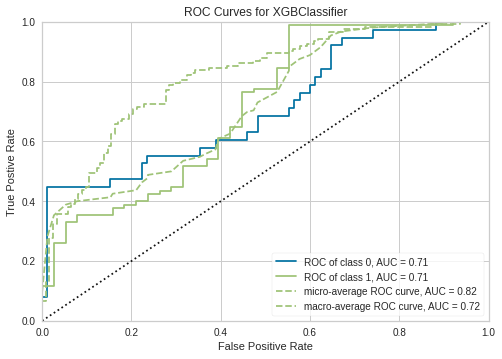

In [0]:
plot_model(xgboost)

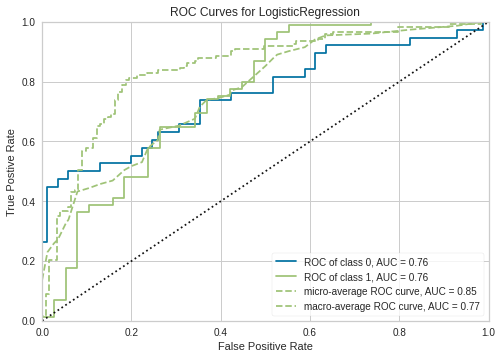

In [0]:
plot_model(lr)

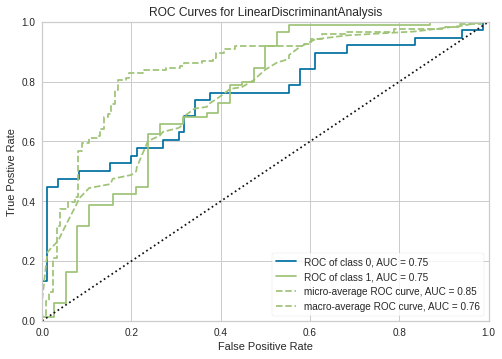

In [0]:
plot_model(lda)

In [0]:
#evaluate xgboost
evaluate_model(tuned_lda)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [0]:
evaluate_model(tuned_lr)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

In [0]:
evaluate_model(tuned_xgboost)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

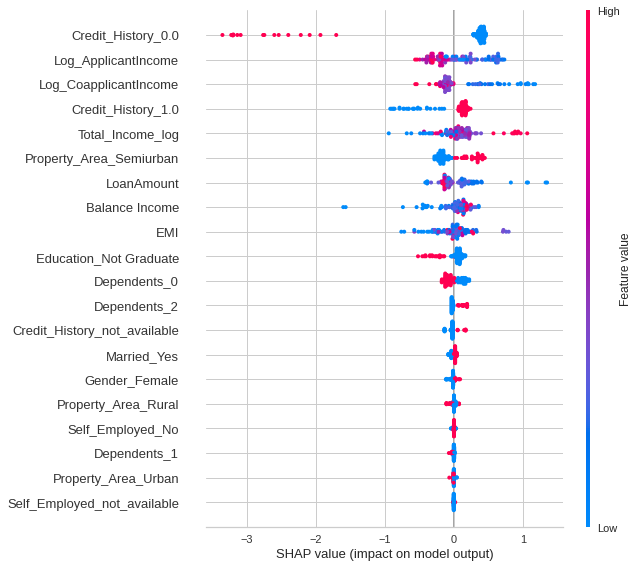

In [0]:
interpret_model(xgboost)

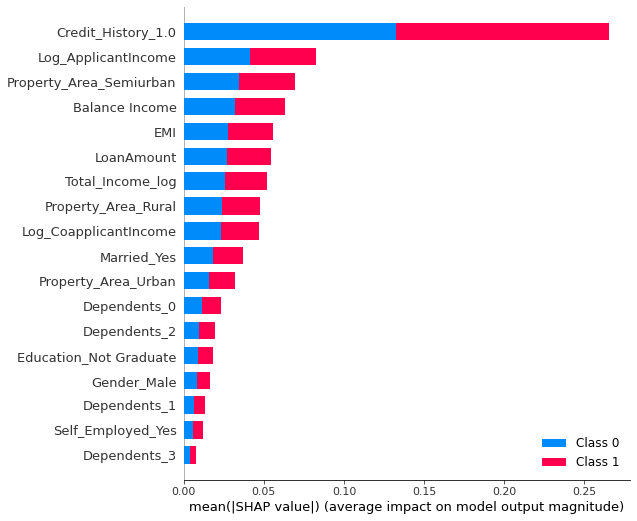

In [31]:
#Work best on tree based model
interpret_model(rf)

In [32]:
calibrated_xgboost = calibrate_model(xgboost)

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.8000,0.7776,0.9706,0.7857,0.8684,0.4703
1,0.7755,0.6742,0.9394,0.7750,0.8493,0.4248
2,0.7755,0.7727,0.9697,0.7619,0.8533,0.4031
3,0.8367,0.8674,1.0000,0.8049,0.8919,0.5739
4,0.7959,0.7627,0.9118,0.8158,0.8611,0.4809
5,0.7551,0.6000,0.9412,0.7619,0.8421,0.3226
6,0.8163,0.6922,0.9412,0.8205,0.8767,0.5232
7,0.8571,0.8941,0.9118,0.8857,0.8986,0.6573
8,0.8571,0.8961,1.0000,0.8293,0.9067,0.6133
9,0.7755,0.7431,1.0000,0.7556,0.8608,0.3354


In [33]:
#create a boosting model
dt_boosted = create_model('dt', ensemble = True, method = 'Boosting')
#calibrate trainde boosted dt
calibrated_dt = calibrate_model(dt_boosted)

,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,0.7600,0.7261,0.9118,0.7750,0.8378,0.3878
1,0.7347,0.6903,0.9394,0.7381,0.8267,0.2946
2,0.7959,0.7415,1.0000,0.7674,0.8684,0.4470
3,0.6735,0.8892,1.0000,0.6735,0.8049,0.0000
4,0.7959,0.8324,1.0000,0.7727,0.8718,0.4096
5,0.7143,0.6667,0.9412,0.7273,0.8205,0.1735
6,0.8163,0.6863,0.9706,0.8049,0.8800,0.5028
7,0.8571,0.8618,0.9412,0.8649,0.9014,0.6438
8,0.7959,0.8167,1.0000,0.7727,0.8718,0.4096
9,0.7551,0.6922,0.9706,0.7500,0.8462,0.2916


In [34]:
#optimize threshold for trained model
#optimize_threshold(xgboost, true_negative = 10, false_negative = -100)
xgboost_pred = predict_model(calibrated_xgboost)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Calibrated Classifier C V,0.813,0.7514,0.9882,0.7925,0.8796,0.4831


In [35]:
ridge_pred = predict_model(tuned_ridge)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Ridge Classifier,0.813,0,1.0,0.787,0.8808,0.4741


In [36]:
lda_pred = predict_model(tuned_lda)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Linear Discriminant Analysis,0.8049,0.7789,0.9882,0.785,0.875,0.456


In [37]:
lr_pred = predict_model(tuned_lr)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Logistic Regression,0.7967,0.7749,0.9765,0.783,0.8691,0.4382


In [38]:
ensemble_pred = predict_model(ensembled_rf)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Bagging Classifier,0.813,0.7676,0.9882,0.7925,0.8796,0.4831


In [39]:
blend_pred = predict_model(blend_specific)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa
0,Voting Classifier,0.8049,0,0.9882,0.785,0.875,0.456


In [0]:
#finalize trained model
final_model = finalize_model(calibrated_xgboost)

If the model returned by finalize_model(), is used on predict_model() without passing a new unseen dataset, then the information grid printed is misleading as the model is trained on the complete dataset including test / hold-out sample. Once finalize_model() is used, the model is considered ready for deployment and should be used on new unseens dataset only.

In [0]:
test=pd.read_csv("//content/test.csv")
submission = pd.read_csv("//content/sample_submission_49d68Cx.csv")

In [0]:
test['Gender'].fillna(test['Gender'].mode()[0], inplace=True)
test['Dependents'].fillna(test['Dependents'].mode()[0], inplace=True)
test['Self_Employed'].fillna(test['Self_Employed'].mode()[0], inplace=True)
test['Credit_History'].fillna(test['Credit_History'].mode()[0], inplace=True)
test['Loan_Amount_Term'].fillna(test['Loan_Amount_Term'].mode()[0], inplace=True)
test['LoanAmount'].fillna(test['LoanAmount'].median(), inplace=True)

In [0]:
test['Total_Income'] = test['ApplicantIncome']+test['CoapplicantIncome']
test['EMI']=test['LoanAmount']/test['Loan_Amount_Term'] 
test['Balance Income']=test['Total_Income']-(test['EMI']*1000)
test['Dependents'].replace('3+', 3,inplace=True)

In [0]:
import numpy as np
test['Total_Income_log'] = np.log(test['Total_Income'])
test['Log_ApplicantIncome'] = np.log(test['ApplicantIncome'])
test['Log_CoapplicantIncome'] = np.log(test['CoapplicantIncome'])

In [0]:
test = test.drop(['Loan_ID','ApplicantIncome','CoapplicantIncome','Loan_Amount_Term','Total_Income'],axis=1)

In [0]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
test['Gender'] = le.fit_transform(test['Gender'])
test['Married'] = le.fit_transform(test['Married'])
test['Education'] = le.fit_transform(test['Education'])
test['Self_Employed'] = le.fit_transform(test['Self_Employed'])
test['Property_Area'] = le.fit_transform(test['Property_Area'])
#One-hot encoding
#categorical_feature_names = ['Gender','Married','Education','Self_Employed','Property_Area']
#test.join(pd.get_dummies(test[categorical_feature_names]))

In [0]:
test.replace([np.inf, -np.inf], np.nan, inplace=True)

In [0]:
#test = test.drop(['Gender','Married','Education','Self_Employed','Property_Area'],axis =1)

In [0]:
# generate predictions on unseen data
predictions = predict_model(final_model, data = test)

In [0]:
#test_pred = final_model.predict(test)
#np.isfinite(test.all())
test_set = pd.read_csv("/content/test.csv")

In [0]:
#That needs to be done on test set
submission['Loan_Status']=ridge_pred#prediction on validtion(hold-out) set
submission['Loan_ID']=test_set['Loan_ID']
submission['Loan_Status'].replace(0, 'N',inplace=True)
submission['Loan_Status'].replace(1, 'Y',inplace=True)
pd.DataFrame(submission, columns=['Loan_ID','Loan_Status']).to_csv('logistic.csv',index=False)

In [0]:
test.shape

(367, 13)

In [0]:
data.shape

(614, 14)